<b><center style="font-size:250%; font-family:verdana;">Which Nation Will Win the FIFA World Cup 2022?</center></b>
<hr class="solid">
<b><center style="font-size:140%; font-family:verdana;">A Machine Learning Analysis To Predict The Group Winners of World Cup — By Zijie Cai</center></b>
<center><img src="siu.gif" width="300" height="500" vspace="12"></center>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Introduction</center></b>
<p style="font-family:verdana;">"The FIFA World Cup is an international association football competition played by the men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The tournament has been held every four years since the inaugural tournament in 1930.The format involves a qualification phase, which takes place over the preceding three years, to determine which teams qualify for the tournament phase. In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over about a month. The host nation(s) automatically qualify.</p>
<p style="font-family:verdana;">Qatar is hosting the 2022 tournament. The trophy has been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina, France, and inaugural winner Uruguay, with two titles each; and England and Spain, with one title each. The reigning champions are France, who won their second title at the 2018 tournament in Russia." </p>
<b><p style="font-family:verdana;">*Above information belong to <a href="https://en.wikipedia.org/wiki/FIFA_World_Cup">WIKIPEDIA</a>. You can also visit the <a href="https://www.fifa.com/tournaments/mens/worldcup">FIFA Official Website</a> to explore more.</p></b>
<p style="font-family:verdana;">In this tutotial, I will be conducting data exploration and analysis over the dataset of international matches records I obtained from Kaggle.com. I will be creating features that might be potentially relevant to the outcome of a match, such as FIFA rank difference between two teams. In addition, I will be providing insights about different features of all the international matches, such as whether there is a significant relationship between the outcome of a match and the difference in average team scores based on offense, midfield, defense, and goalkeeper. Then, I will be using these attributes to predict the outcome of every match between two teams in the 2022 World Cup. Hopefully, this can be a useful reference for sports betting, or simply some fun statistics and simulations of the FIFA 2022 World Cup for fans.</p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">The Dataset</center></b>
<p style="font-family:verdana; padding-top:5px">The dataset I will be using is from Kaggle.com. This dataset provides a complete overview of all international soccer matches played since the 1990s. Additionally, it includes the FIFA ranking of each national team along with their FIFA points and team scores. <b style="font-family:verdana;">*More information can be found <a href="https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022">here</a>.</b></p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Data Preparation</center></b>
<b><p style="font-family:verdana; padding-top:5px">Step 1: Import the needed Python libraries for data exploration and analysis.</b></p>
<p style="font-family:verdana;">Python has many libraries with built-in functions to help with Data Science. <b style="font-family:verdana;"> *Check out the following links and decriptions for more details:</b>
<ul>
    <li style="font-family:verdana;"><a href="https://pandas.pydata.org/docs/index.html#"><b>Pandas</b></a>: a Python library that offers many functions and structures to help with data manipulation and analysis.</li>
    <li style="font-family:verdana;"><a href="https://matplotlib.org/stable/index.html#"><b>Matplotlib</b></a>: a Python library that offers plotting tools for data visualizations.</li>
    <li style="font-family:verdana;"><a href="https://numpy.org/doc/"><b>Numpy</b></a>: a Python library that offers functions to support array and matrix operations.</li>
    <li style="font-family:verdana;"><a href="https://docs.python.org/3/library/math.html"><b>Math</b></a>: a Python library that offers standard mathematical functions.</li>
    <li style="font-family:verdana;"><a href="https://numpy.org/doc/"><b>Seaborn</b></a>: a Python library that offers high-level interfaces for data visualizations.</li>
    <li style="font-family:verdana;"><a href="https://scikit-learn.org/stable/"><b>Scikit-learn</b></a>: a machine learning Python library that offers various clustering, classification and regression models and algorithms for predictive data analysis.</li>
    <li style="font-family:verdana;"><a href="https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html"><b>IPython.display</b></a>: a public application programming interface module for display tools in IPython.</li>
</ul>
</p>

In [187]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import math 
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display_html

<b><p style="font-family:verdana;">Step 2: Read the CSV file of the dateset into a pandas dataframe.</b></p>
<p style="font-family:verdana;">The dataset of all of the international matches since 1990s from Kaggle.com is stored in a comma-separated values (CSV) file. The pandas library from Python has a built-in function read_csv to load the CSV file of the dataset into a pandas dataframe in order to store the data in a table like format (rows by columns).</p>

In [188]:
# Load the CSV file of the dataset of international matches into a pandas dataframe
df = pd.read_csv("international_matches.csv")

# Visualization of the data table
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


<p style="font-family:verdana;">As you can see from the bottom left corner of the visualization of the data table, the dimension of the dataframe of international macthes is 23921 rows x 25 columns. This can be interpreted as there are a total of 23920 records of international matches (rows) in the dataset and each one of them contains 25 different attributes (columns).</p>
<p style="font-family:verdana;">The following is a breakdown of what each of the 25 attributes (columns) represents:
<ul>
    <li style="font-family:verdana;"><b>date</b>: the date of the match.</li>
    <li style="font-family:verdana;"><b>home_team</b>: the name of the nation of the home team of the match.</li>
    <li style="font-family:verdana;"><b>away_team</b>: the name of the nation of the away team of the match.</li>
    <li style="font-family:verdana;"><b>home_team_continent</b>: the name of the continent of the home team of the match.</li>
    <li style="font-family:verdana;"><b>away_team_continent</b>: the name of the continent of the away team of the match.</li>
    <li style="font-family:verdana;"><b>home_team_fifa_rank</b>: the FIFA rank of the home team at the time of the match.</li>
    <li style="font-family:verdana;"><b>away_team_fifa_rank</b>: the FIFA rank of the away team at the time of the match.</li>
    <li style="font-family:verdana;"><b>home_team_total_fifa_points</b>: The total number of FIFA points of the home team at the time of the match.</li>
    <li style="font-family:verdana;"><b>away_team_total_fifa_points</b>: The total number of FIFA points of the away team at the time of the match.</li>
    <li style="font-family:verdana;"><b>home_team_score</b>: the full-time score of the home team including extra time, not including penalty-shootouts.</li>
    <li style="font-family:verdana;"><b>away_team_score</b>: the full-time score of the away team including extra time, not including penalty-shootouts.</li>
    <li style="font-family:verdana;"><b>tournament</b>: the name of the tournament, or the purpose of the match.</li>
    <li style="font-family:verdana;"><b>city</b>: the name of the city where the match is played.</li>
    <li style="font-family:verdana;"><b>country</b>: the name of the country where the match is played.</li>
    <li style="font-family:verdana;"><b>neutral_location</b>: TRUE/FALSE indicating whether the match is played at a neutral venue (no home/away difference).</li>
    <li style="font-family:verdana;"><b>shoot_out</b>: TRUE/FALSE indicating whether the match included a penalty shootout.</li>
    <li style="font-family:verdana;"><b>home_team_result</b>: the result of the match of the home team, including penalty-shootouts.</li>
    <li style="font-family:verdana;"><b>home_team_goalkeeper_score</b>: the FIFA game score of the highest ranked goalkeeper of the home team.</li>
    <li style="font-family:verdana;"><b>away_team_goalkeeper_score</b>: the FIFA game score of the highest ranked goalkeeper of the away team.</li>
    <li style="font-family:verdana;"><b>home_team_mean_defense_score</b>: the average FIFA game score of the 4 highest ranked defensive players of the home team.</li>
    <li style="font-family:verdana;"><b>home_team_mean_offense_score</b>: the average FIFA game score of the 3 highest ranked offensive players of the home team.</li>
    <li style="font-family:verdana;"><b>home_team_mean_midfield_score</b>: the average FIFA game score of the 4 highest ranked midfield players of the home team.</li>
    <li style="font-family:verdana;"><b>away_team_mean_defense_score</b>: the average FIFA game score of the 4 highest ranked defensive players of the away team.</li>
    <li style="font-family:verdana;"><b>away_team_mean_offense_score</b>: the average FIFA game score of the 3 highest ranked offensive players of the away team.</li>
    <li style="font-family:verdana;"><b>away_team_mean_midfield_score</b>: the average FIFA game score of the 4 highest ranked midfield players of the away team.</li>
</ul>    
</p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Data Wrangling and Cleaning</center></b>
<b><p style="font-family:verdana; padding-top:5px">Step 1: Extract only the international matches/rows from the most recent 20 years. </b></p>
<p style="font-family:verdana; padding-top:5px">Since the objective of the tutorial is to predict the group winners of the FIFA World Cup 2022, the match data from more than 20 years ago (before 2002) will not be really useful. <b>*A fun fact: not a single soccer player in history has played in more than 5 consecutive World Cup tournaments (equivalent to a period of 20 years)!</b></p>

In [189]:
# Check the data type of the date column in the dataframe
df["date"].dtypes

dtype('O')

<p style="font-family:verdana; padding-top:5px">Notice that the date values are type "object", which is equivalent to "string" in pandas. Therefore, we can use string functions from the Python library on the date values.</p>

In [190]:
# Slice the date string to only have the year and then use apply function to extract rows with year as int greater than or equal to 2002 
df = df[df["date"].apply(lambda x: int(x[:4]) >= 2002)]

# Visualization of the updated dataframe with only matches from the most recent 20 years 
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
6059,2002-01-04,Bahrain,Finland,Asia,Europe,110,46,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6060,2002-01-04,Egypt,Ghana,Africa,Africa,41,59,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6061,2002-01-05,Albania,North Macedonia,Europe,Europe,96,89,0,0,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6062,2002-01-05,Kuwait,Zimbabwe,Asia,Africa,74,68,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6063,2002-01-06,Cuba,Guatemala,North America,North America,76,67,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


<p style="font-family:verdana; padding-top:5px">The goal was to only preserve the international matches data from the most recent 20 years (after 2002). So we treat the date values as strings and uses the string slice function to extract the year value from the date string. Since the date string is formatted as "year-month-day", we can pull out the first four characters which would be a string of only the year value. Then, we convert the year string to an int value. Lastly, we use the pandas apply function, which allows us to apply a boolean function along an axis of the dataframe (in this case, the date column). Inside the function, we want to keep the rows with year value greater than or equal to 2002.</p>

<b><p style="font-family:verdana;">Step 2: Remove all the international macthes/rows with at least one entry with unknown (NaN) value.</b></p>
<p style="font-family:verdana; padding-top:5px">If you take a look at the data table, you will notice that there are many missing entries with NaN values for the team scores. In order to be able to correctly and more easily calculate the average team scores based on offense, midfield, defense, and goalkeeper, we would want to remove these values. Also, note that this will not have a significant impact to our prediction of group winners. Since teams play more than one match, in the more recent years, the data for team scores is more complete and more relevant, so all teams would have enough scores to be analyzed, even if the score was missing back at the time of the match.</p>

In [191]:
# Drop the rows where at least one element is missing
df = df.dropna()

# Visualization of the updated dataframe with no missing entries
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8264,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,No,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8
8266,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,No,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,No,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,1,...,No,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5
8278,2004-09-04,Italy,Norway,Europe,Europe,9,38,0,0,2,...,No,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2


<p style="font-family:verdana; padding-top:5px">Pandas built-in dropna function drops all the rows where there is at least one element missing. Now we have no missing values in our data table!</p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Feature Engineering and Data Analysis</center></b>
<b><p style="font-family:verdana; padding-top:5px">Part 1: Create new features that might have an impact on predicting the outcome of a soccer match based on existing column values.</b></p>
<ul>
    <li style="font-family:verdana;"><b>Feature 1: the difference in average team scores based on offense, midfield, defense, and goalkeeper between teams.</b></li>
</ul>    
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a soccer match and the difference of the average team scores between two teams. In order to do so, I will select the columns of team scores at different positions, calculate the overall average team score, and find the difference between the average team scores for every international match. Then, I will create a new column in the dataframe to store the feature values.</p>

In [192]:
# Calculate the total sum of the team scores based on the positions for both home teams and away teams
home_team_score_sum = df["home_team_goalkeeper_score"] + df["home_team_mean_defense_score"] + df["home_team_mean_midfield_score"] + df["home_team_mean_offense_score"]
away_team_score_sum = df["away_team_goalkeeper_score"] + df["away_team_mean_defense_score"] + df["away_team_mean_midfield_score"] + df["away_team_mean_offense_score"]

# Calculate the average team scores by dividing the total sum of team scores by total number of positions (4)
home_team_avg_score = home_team_score_sum / 4
away_team_avg_score = away_team_score_sum / 4

# Calculate the difference in average team scores by subtracting the home team average score by the away team average score
team_avg_score_diff = home_team_avg_score - away_team_avg_score

# Create a new column in the dataframe and store the values of the difference in average team scores for every match
df["team_avg_score_diff"] = team_avg_score_diff

# Visualization of the updated dataframe with the added feature column
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff
8264,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,Draw,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,8.400
8266,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,Draw,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,-13.050
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,Win,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,5.875
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,1,...,Lose,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,-3.425
8278,2004-09-04,Italy,Norway,Europe,Europe,9,38,0,0,2,...,Win,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,12.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5,-4.575
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8,2.625
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5,1.600
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2,3.775


<p style="font-family:verdana;">Now, we have a new column "team_avg_score_diff" in the data table, which contains the difference of the average team scores between two teams for every match.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 2: the difference in FIFA ranks by FIFA points between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in FIFA ranks scaled by FIFA points between two teams. I will select columns of home_team_fifa_rank and away_team_fifa_rank and scale each of them by home_team_fifa_points and away_team_fifa_points and then calculate the difference between them by subtraction. The reason of scaling the rank by points instead of only using ranks is to increase the feature importance and reduce the margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [193]:
# Calculate the difference in fifa rank scaled by points between two teams and store it in a new column of the dataframe
df["fifa_rank_by_points_diff"] = df["home_team_fifa_rank"] / df["home_team_total_fifa_points"] - df["away_team_fifa_rank"] / df["away_team_total_fifa_points"]

# Visualization of the updated dataframe with the added feature column
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff
8264,2004-09-03,Spain,Scotland,Europe,Europe,3,67,0,0,1,...,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,8.400,NaN
8266,2004-09-04,Austria,England,Europe,Europe,90,7,0,0,2,...,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,-13.050,NaN
8271,2004-09-04,Croatia,Hungary,Europe,Europe,25,76,0,0,3,...,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,5.875,NaN
8276,2004-09-04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,1,...,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,-3.425,NaN
8278,2004-09-04,Italy,Norway,Europe,Europe,9,38,0,0,2,...,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,12.525,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5,-4.575,0.015745
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8,2.625,-0.014847
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5,1.600,0.001967
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2,3.775,-0.018966


<p style="font-family:verdana;">Now, we have a new column "fifa_rank_by_points_diff" in the data table, which contains the difference of FIFA rankings between two teams for every match.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 3: the difference in FIFA points scaled by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in FIFA points by FIFA ranks between two teams. In order to do so, I will select the columns of home_team_total_fifa_points and away_team_total_fifa_points and scale each of them by the home-team_fifa_rank and away_team_fifa_rank and then calculate the difference between them by subtraction. The reason of scaling the points by ranks instead of only using points is to increase the feature importance and reduce the margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [194]:
# Calculate the difference in fifa points scaled by rank between two teams and store it in a new column of the dataframe
df["fifa_points_by_rank_diff"] = df["home_team_total_fifa_points"] / df["home_team_fifa_rank"] - df["away_team_total_fifa_points"] / df["away_team_fifa_rank"]

# Remove the matches/rows with 0 value of fifa_points_by_rank_diff, which indicates missing entries
df = df[df["fifa_points_by_rank_diff"].apply(lambda x: x != 0)]

# Visualization of the updated dataframe with the added feature column
display(df)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff
14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,1,...,64.0,80.8,88.3,85.2,72.2,73.7,75.5,11.475,-0.062686,98.911616
14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,0,...,76.0,63.2,67.3,68.0,72.0,77.7,78.0,-7.550,0.004024,-1.063164
14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,0,...,83.0,70.8,73.7,73.5,84.0,81.3,85.8,-9.025,0.083778,-282.529412
14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,5,...,63.0,70.5,74.7,76.8,65.2,72.3,71.8,4.675,0.065288,-7.025722
14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,6,...,75.0,83.0,83.7,85.0,75.8,74.0,74.5,9.850,-0.141810,436.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,89.0,75.2,84.7,75.8,80.8,85.7,85.5,-4.575,0.015745,-854.115385
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,75.0,74.8,78.7,80.0,76.5,72.7,73.8,2.625,-0.014847,26.022065
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,83.0,74.2,77.0,78.0,70.0,72.3,73.5,1.600,0.001967,-1.141243
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,65.0,73.5,73.7,75.0,76.2,74.7,68.2,3.775,-0.018966,10.953571


<p style="font-family:verdana;">Now, we have a new column "fifa_points_by_rank_diff" in the data table, which contains the difference of FIFA rankings between two teams for every match.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 4: the difference in average goals/scores per match between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average goals/scores per match between two teams. In order to do so, I will need to calculate the average scores per match for each home and away team based on all of the international macthes they participate in and subtract them for the difference. Then, I will create a new column in the dataframe to store the feature values.</p>

In [195]:
# Extract the list of teams in the dataframe by concatenating both home_team and away_team columns using pandas
# built-in concat function and then calling the pandas unique function to find a list of unique teams 
teams = pd.concat([df["home_team"], df["away_team"]]).unique()

# Create a dictionary to store the average goals per match for each team
dic = {}

# Loop through the list of teams and calculate the average goals for each of them
for i in teams: 
    
    # Extract the matches/rows with current target team involved as home team
    target_home_team_rows = df[df["home_team"].apply(lambda x: x == i)]
    
    # Calculate the total number of goals scored by the target team as home team and number of matches the target team played as home team
    home_score_sum = sum(target_home_team_rows["home_team_score"])
    home_score_len = len(target_home_team_rows["home_team_score"])
    
    # Extract the matches/rows with current target team involved as away team
    target_away_team_rows = df[df["away_team"].apply(lambda x: x == i)]
    
    # Calculate the total number of goals scored by the target team as away team and number of matches the target team played as away team
    away_score_sum = sum(target_away_team_rows["away_team_score"])
    away_score_len = len(target_away_team_rows["away_team_score"])
    
    # Calculate the average goals of the target team 
    avg_scores_per_match = (home_score_sum + away_score_sum) / (home_score_len + away_score_len)
    
    # Store the value in the dictionary for the index of the target team
    dic[i] = avg_scores_per_match

# Create a list to store the difference of average goals between the home team and away team of a match
goal_diff = []

# Reset the indices of the dataframe for accessing entries using index
df = df.reset_index()

# Loop through all of the matches/rows
for i in range(len(df)):
    home_avg_score = dic[df["home_team"][i]] # Extract the average goals of the home team from the dictionary
    away_avg_score = dic[df["away_team"][i]] # Extract the average goals of the away team from the dictionary
    goal_diff.append(home_avg_score - away_avg_score) # Calculate the difference of average goals per match between the two teams using subtraction

# Create a new column in the dataframe and store the feature values 
df["team_avg_goal_diff"] = goal_diff

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,80.8,88.3,85.2,72.2,73.7,75.5,11.475,-0.062686,98.911616,0.658103
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,63.2,67.3,68.0,72.0,77.7,78.0,-7.550,0.004024,-1.063164,-0.474026
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,70.8,73.7,73.5,84.0,81.3,85.8,-9.025,0.083778,-282.529412,-0.927485
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,70.5,74.7,76.8,65.2,72.3,71.8,4.675,0.065288,-7.025722,0.662281
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,83.0,83.7,85.0,75.8,74.0,74.5,9.850,-0.141810,436.058824,0.855794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,75.2,84.7,75.8,80.8,85.7,85.5,-4.575,0.015745,-854.115385,-0.617951
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,74.8,78.7,80.0,76.5,72.7,73.8,2.625,-0.014847,26.022065,0.379227
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,74.2,77.0,78.0,70.0,72.3,73.5,1.600,0.001967,-1.141243,0.113561
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,73.5,73.7,75.0,76.2,74.7,68.2,3.775,-0.018966,10.953571,0.258443


<p style="font-family:verdana;">Now, we have a new column "team_avg_goal_diff" in the data table, which contains the difference in average goals/scores per match between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 5: the difference in average goals/scores suffered per match between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average goals/scores suffered per match between two teams. In order to do so, I will need to calculate the average scores suffered per match for each home and away team based on all of the international macthes they participate in and subtract them for the difference. Then, I will create a new column in the dataframe to store the feature values.</p>

In [196]:
# Extract the list of teams in the dataframe by concatenating both home_team and away_team columns using pandas
# built-in concat function and then calling the pandas unique function to find a list of unique teams 
teams = pd.concat([df["home_team"], df["away_team"]]).unique()

# Create a dictionary to store the average goals suffered per match for each team
dic1 = {}

# Loop through the list of teams and calculate the average goals suffered for each of them
for i in teams: 
    
    # Extract the matches/rows with current target team involved as home team
    target_home_team_rows = df[df["home_team"].apply(lambda x: x == i)]
    
    # Calculate the total number of goals suffered by the target team as home team (total goals of away team) and number of matches the target team played as home team
    home_score_suffered_sum = sum(target_home_team_rows["away_team_score"])
    home_score_suffered_len = len(target_home_team_rows["away_team_score"])
    
    # Extract the matches/rows with current target team involved as away team
    target_away_team_rows = df[df["away_team"].apply(lambda x: x == i)]
    
    # Calculate the total number of goals suffered by the target team as away team (total goals of home team) and number of matches the target team played as away team
    away_score_suffered_sum = sum(target_away_team_rows["home_team_score"])
    away_score_suffered_len = len(target_away_team_rows["home_team_score"])
    
    # Calculate the average goals suffered of the target team 
    avg_scores_suffered_per_match = (home_score_suffered_sum + away_score_suffered_sum) / (home_score_suffered_len + away_score_suffered_len)
    
    # Store the value in the dictionary for the index of the target team
    dic1[i] = avg_scores_suffered_per_match
    
# Create a list to store the difference of average goals suffered between the home team and away team of a match
goal_suffered_diff = []

# Loop through all of the matches/rows
for i in range(len(df)):
    home_avg_score_suffered = dic1[df["home_team"][i]] # Extract the average goals suffered of the home team from the dictionary
    away_avg_score_suffered = dic1[df["away_team"][i]] # Extract the average goals suffered of the away team from the dictionary
    goal_suffered_diff.append(home_avg_score_suffered - away_avg_score_suffered) # Calculate the difference of average goals suffered between the two teams using subtraction

# Create a new column in the dataframe and store the feature values 
df["team_avg_goal_suffered_diff"] = goal_suffered_diff

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,88.3,85.2,72.2,73.7,75.5,11.475,-0.062686,98.911616,0.658103,-0.710923
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,67.3,68.0,72.0,77.7,78.0,-7.550,0.004024,-1.063164,-0.474026,0.503247
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,73.7,73.5,84.0,81.3,85.8,-9.025,0.083778,-282.529412,-0.927485,0.790061
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,74.7,76.8,65.2,72.3,71.8,4.675,0.065288,-7.025722,0.662281,-0.511404
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,83.7,85.0,75.8,74.0,74.5,9.850,-0.141810,436.058824,0.855794,0.013072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,84.7,75.8,80.8,85.7,85.5,-4.575,0.015745,-854.115385,-0.617951,0.184569
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,78.7,80.0,76.5,72.7,73.8,2.625,-0.014847,26.022065,0.379227,0.008454
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,77.0,78.0,70.0,72.3,73.5,1.600,0.001967,-1.141243,0.113561,-0.183479
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,73.7,75.0,76.2,74.7,68.2,3.775,-0.018966,10.953571,0.258443,-0.425891


<p style="font-family:verdana;">Now, we have a new column "team_avg_goal_suffered_diff" in the data table, which contains the difference in average goals/scores suffered per match between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 6: the difference in average goalkeeper score by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average goalkeeper score scaled by FIFA ranks between two teams. In order to do so, I will select the home_team_goalkeeper_socre and away_team_goalkeeper_score columns and scale each of them with the FIFA ranks for a match and then calculate the difference between them by subtraction. The reason for scaling the goalkeeper score by FIFA ranks is to increase the feature importance and reduce margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [197]:
# Calculate the difference in goalkeeper score scaled by ranks between two teams and store it in a new column of the dataframe
df["goalkeeper_score_by_rank_diff"] = df["home_team_goalkeeper_score"] / df["home_team_fifa_rank"] - df["away_team_goalkeeper_score"] / df["away_team_fifa_rank"]

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,85.2,72.2,73.7,75.5,11.475,-0.062686,98.911616,0.658103,-0.710923,7.101010
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,68.0,72.0,77.7,78.0,-7.550,0.004024,-1.063164,-0.474026,0.503247,-0.119450
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,73.5,84.0,81.3,85.8,-9.025,0.083778,-282.529412,-0.927485,0.790061,-19.181373
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,76.8,65.2,72.3,71.8,4.675,0.065288,-7.025722,0.662281,-0.511404,-0.419662
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,85.0,75.8,74.0,74.5,9.850,-0.141810,436.058824,0.855794,0.013072,27.897059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,75.8,80.8,85.7,85.5,-4.575,0.015745,-854.115385,-0.617951,0.184569,-41.153846
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,80.0,76.5,72.7,73.8,2.625,-0.014847,26.022065,0.379227,0.008454,1.182033
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,78.0,70.0,72.3,73.5,1.600,0.001967,-1.141243,0.113561,-0.183479,-0.168005
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,75.0,76.2,74.7,68.2,3.775,-0.018966,10.953571,0.258443,-0.425891,0.675595


<p style="font-family:verdana;">Now, we have a new column "goalkeeper_score_by_rank_diff" in the data table, which contains the difference in goalkeeper score scaled by FIFA ranks between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 7: the difference in average defense score by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average defense score scaled by FIFA ranks between two teams. In order to do so, I will select the home_team_mean_defense_socre and away_team_mean_defense_score columns and scale each of them with the FIFA ranks for a match and then calculate the difference between them by subtraction. The reason for scaling the defense score by FIFA ranks is to increase the feature importance and reduce margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [198]:
# Calculate the difference in defense score scaled by ranks between two teams and store it in a new column of the dataframe
df["defense_score_by_rank_diff"] = df["home_team_mean_defense_score"] / df["home_team_fifa_rank"] - df["away_team_mean_defense_score"] / df["away_team_fifa_rank"]

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff,defense_score_by_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,72.2,73.7,75.5,11.475,-0.062686,98.911616,0.658103,-0.710923,7.101010,7.336869
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,72.0,77.7,78.0,-7.550,0.004024,-1.063164,-0.474026,0.503247,-0.119450,-0.304690
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,84.0,81.3,85.8,-9.025,0.083778,-282.529412,-0.927485,0.790061,-19.181373,-19.611765
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,65.2,72.3,71.8,4.675,0.065288,-7.025722,0.662281,-0.511404,-0.419662,-0.448097
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,75.8,74.0,74.5,9.850,-0.141810,436.058824,0.855794,0.013072,27.897059,26.551961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,80.8,85.7,85.5,-4.575,0.015745,-854.115385,-0.617951,0.184569,-41.153846,-37.507692
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,76.5,72.7,73.8,2.625,-0.014847,26.022065,0.379227,0.008454,1.182033,1.142711
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,70.0,72.3,73.5,1.600,0.001967,-1.141243,0.113561,-0.183479,-0.168005,0.029557
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,76.2,74.7,68.2,3.775,-0.018966,10.953571,0.258443,-0.425891,0.675595,0.442679


<p style="font-family:verdana;">Now, we have a new column "defense_score_by_rank_diff" in the data table, which contains the difference in defense score scaled by FIFA ranks between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 8: the difference in average midfield score by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average midfield score scaled by FIFA ranks between two teams. In order to do so, I will select the home_team_mean_midfield_socre and away_team_mean_midfield_score columns and scale each of them with the FIFA ranks for a match and then calculate the difference between them by subtraction. The reason for scaling the midfield score by FIFA ranks is to increase the feature importance and reduce margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [199]:
# Calculate the difference in midfield score scaled by ranks between two teams and store it in a new column of the dataframe
df["midfield_score_by_rank_diff"] = df["home_team_mean_midfield_score"] / df["home_team_fifa_rank"] - df["away_team_mean_midfield_score"] / df["away_team_fifa_rank"]

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,away_team_mean_offense_score,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff,defense_score_by_rank_diff,midfield_score_by_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,73.7,75.5,11.475,-0.062686,98.911616,0.658103,-0.710923,7.101010,7.336869,7.750758
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,77.7,78.0,-7.550,0.004024,-1.063164,-0.474026,0.503247,-0.119450,-0.304690,-0.341463
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,81.3,85.8,-9.025,0.083778,-282.529412,-0.927485,0.790061,-19.181373,-19.611765,-20.008824
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,72.3,71.8,4.675,0.065288,-7.025722,0.662281,-0.511404,-0.419662,-0.448097,-0.506131
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,74.0,74.5,9.850,-0.141810,436.058824,0.855794,0.013072,27.897059,26.551961,27.237745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,85.7,85.5,-4.575,0.015745,-854.115385,-0.617951,0.184569,-41.153846,-37.507692,-39.834615
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,72.7,73.8,2.625,-0.014847,26.022065,0.379227,0.008454,1.182033,1.142711,1.392750
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,72.3,73.5,1.600,0.001967,-1.141243,0.113561,-0.183479,-0.168005,0.029557,0.032560
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,74.7,68.2,3.775,-0.018966,10.953571,0.258443,-0.425891,0.675595,0.442679,0.588214


<p style="font-family:verdana;">Now, we have a new column "midfield_score_by_rank_diff" in the data table, which contains the difference in midfield score scaled by FIFA ranks between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 9: the difference in average offense score by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average offense score scaled by FIFA ranks between two teams. In order to do so, I will select the home_team_mean_offense_socre and away_team_mean_offense_score columns and scale each of them with the FIFA ranks for a match and then calculate the difference between them by subtraction. The reason for scaling the offense score by FIFA ranks is to increase the feature importance and reduce margin of error. I will create a new column in the dataframe to store the feature values.</p>

In [200]:
# Calculate the difference in midfield score scaled by ranks between two teams and store it in a new column of the dataframe
df["offense_score_by_rank_diff"] = df["home_team_mean_offense_score"] / df["home_team_fifa_rank"] - df["away_team_mean_offense_score"] / df["away_team_fifa_rank"]

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,away_team_mean_midfield_score,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff,defense_score_by_rank_diff,midfield_score_by_rank_diff,offense_score_by_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,75.5,11.475,-0.062686,98.911616,0.658103,-0.710923,7.101010,7.336869,7.750758,8.136111
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,78.0,-7.550,0.004024,-1.063164,-0.474026,0.503247,-0.119450,-0.304690,-0.341463,-0.350844
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,85.8,-9.025,0.083778,-282.529412,-0.927485,0.790061,-19.181373,-19.611765,-20.008824,-18.879902
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,71.8,4.675,0.065288,-7.025722,0.662281,-0.511404,-0.419662,-0.448097,-0.506131,-0.549577
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,74.5,9.850,-0.141810,436.058824,0.855794,0.013072,27.897059,26.551961,27.237745,26.811765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,85.5,-4.575,0.015745,-854.115385,-0.617951,0.184569,-41.153846,-37.507692,-39.834615,-39.592308
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,73.8,2.625,-0.014847,26.022065,0.379227,0.008454,1.182033,1.142711,1.392750,1.368006
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,73.5,1.600,0.001967,-1.141243,0.113561,-0.183479,-0.168005,0.029557,0.032560,0.036664
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,68.2,3.775,-0.018966,10.953571,0.258443,-0.425891,0.675595,0.442679,0.588214,0.468274


<p style="font-family:verdana;">Now, we have a new column "offense_score_by_rank_diff" in the data table, which contains the difference in offense score scaled by FIFA ranks between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 10: the difference in average goals by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average goals scaled by FIFA ranks between two teams. I will use the previously calculated average goals for each national team and scale the values by the FIFA ranks and calculate the difference between them for a match. Then, I will create a new column in the dataframe to store the feature values.</p>

In [201]:
# Create a list for the values of difference in average goals by ranks
goal_rank_diff = []

# Loop through all of the matches/rows
for i in range(len(df)):
    home_avg_goal_rank = dic[df["home_team"][i]] / df["home_team_fifa_rank"][i] # Extract the average goals of the home team from the dictionary and scale it by rank
    away_avg_goal_rank = dic[df["away_team"][i]] / df["away_team_fifa_rank"][i] # Extract the average goals of the away team from the dictionary and scale it by rank
    goal_rank_diff.append(home_avg_goal_rank - away_avg_goal_rank) # Calculate the difference of average goals by rank between the two teams using subtraction

# Create a new column in the dataframe and store the feature values 
df["goal_rank_diff"] = goal_rank_diff

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,team_avg_score_diff,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff,defense_score_by_rank_diff,midfield_score_by_rank_diff,offense_score_by_rank_diff,goal_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,11.475,-0.062686,98.911616,0.658103,-0.710923,7.101010,7.336869,7.750758,8.136111,0.159585
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,-7.550,0.004024,-1.063164,-0.474026,0.503247,-0.119450,-0.304690,-0.341463,-0.350844,-0.012780
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,-9.025,0.083778,-282.529412,-0.927485,0.790061,-19.181373,-19.611765,-20.008824,-18.879902,-0.411442
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,4.675,0.065288,-7.025722,0.662281,-0.511404,-0.419662,-0.448097,-0.506131,-0.549577,0.004226
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,9.850,-0.141810,436.058824,0.855794,0.013072,27.897059,26.551961,27.237745,26.811765,0.647163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,-4.575,0.015745,-854.115385,-0.617951,0.184569,-41.153846,-37.507692,-39.834615,-39.592308,-0.942363
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,2.625,-0.014847,26.022065,0.379227,0.008454,1.182033,1.142711,1.392750,1.368006,0.026894
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,1.600,0.001967,-1.141243,0.113561,-0.183479,-0.168005,0.029557,0.032560,0.036664,0.001413
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,3.775,-0.018966,10.953571,0.258443,-0.425891,0.675595,0.442679,0.588214,0.468274,0.010799


<p style="font-family:verdana;">Now, we have a new column "goal_rank_diff" in the data table, which contains the difference in average goals scaled by FIFA ranks between two teams.</p>
<ul>
    <li style="font-family:verdana;"><b>Feature 11: the difference in average goals suffered by FIFA ranks between two teams.</b></li>
</ul>   
<p style="font-family:verdana;">For this feature, I would like to know whether there is a significant relationship between the outcome of a match and the difference in average goals suffered scaled by FIFA ranks between two teams. I will use the previously calculated average goals suffered for each national team and scale the values by the FIFA ranks and calculate the difference between them for a match. Then, I will create a new column in the dataframe to store the feature values.</p>

In [202]:
# Create a list for the values of difference in average goals by ranks
goal_suffered_rank_diff = []

# Loop through all of the matches/rows
for i in range(len(df)):
    home_avg_goal_rank = dic1[df["home_team"][i]] / df["home_team_fifa_rank"][i] # Extract the avg goals suffered of the home team from the dictionary and scale it by rank
    away_avg_goal_rank = dic1[df["away_team"][i]] / df["away_team_fifa_rank"][i] # Extract the avg goals suffered of the away team from the dictionary and scale it by rank
    goal_suffered_rank_diff.append(home_avg_goal_rank - away_avg_goal_rank) # Calculate the difference of avg goals suffered by rank between the two teams using subtraction

# Create a new column in the dataframe and store the feature values 
df["goal_suffered_rank_diff"] = goal_suffered_rank_diff

# Visualization of the updated dataframe with the added feature column
display(df)

,index,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,...,fifa_rank_by_points_diff,fifa_points_by_rank_diff,team_avg_goal_diff,team_avg_goal_suffered_diff,goalkeeper_score_by_rank_diff,defense_score_by_rank_diff,midfield_score_by_rank_diff,offense_score_by_rank_diff,goal_rank_diff,goal_suffered_rank_diff
0,14271,2011-09-02,Argentina,Venezuela,South America,South America,9,44,1016,615,...,-0.062686,98.911616,0.658103,-0.710923,7.101010,7.336869,7.750758,8.136111,0.159585,0.061270
1,14275,2011-09-02,Belarus,Bosnia and Herzegovina,Europe,Europe,41,39,645,655,...,0.004024,-1.063164,-0.474026,0.503247,-0.119450,-0.304690,-0.341463,-0.350844,-0.012780,0.010715
2,14276,2011-09-02,Bulgaria,England,Europe,Europe,51,4,585,1176,...,0.083778,-282.529412,-0.927485,0.790061,-19.181373,-19.611765,-20.008824,-18.879902,-0.411442,-0.175178
3,14281,2011-09-02,Ecuador,Jamaica,South America,North America,66,43,491,622,...,0.065288,-7.025722,0.662281,-0.511404,-0.419662,-0.448097,-0.506131,-0.549577,0.004226,-0.022471
4,14286,2011-09-02,Germany,Austria,Europe,Europe,3,68,1329,472,...,-0.141810,436.058824,0.855794,0.013072,27.897059,26.551961,27.237745,26.811765,0.647163,0.393791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,...,0.015745,-854.115385,-0.617951,0.184569,-41.153846,-37.507692,-39.834615,-39.592308,-0.942363,-0.472363
2909,23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,...,-0.014847,26.022065,0.379227,0.008454,1.182033,1.142711,1.392750,1.368006,0.026894,0.018129
2910,23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,...,0.001967,-1.141243,0.113561,-0.183479,-0.168005,0.029557,0.032560,0.036664,0.001413,-0.003960
2911,23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,...,-0.018966,10.953571,0.258443,-0.425891,0.675595,0.442679,0.588214,0.468274,0.010799,0.002460


<p style="font-family:verdana;">Now, we have a new column "goal_suffered_rank_diff" in the data table, which contains the difference in average goals suffered scaled by FIFA ranks between two teams.</p>
<b><p style="font-family:verdana; padding-top:5px">Part 2: Analyze the correlations and importance among the features created.</b></p>
<ul>
    <li style="font-family:verdana;"><b>Create a diagonal correlation matrix of all the features:</b></li>
</ul> 
<p style="font-family:verdana;">After creating the features for the machine learning model, we want to make sure that we only use the features that are important and necessary for prediction. I will be creating a high-level visualization of a correlation heat map among all the features using Python's seaborn library. Based on the visualization, we can determine if two features have really high correlations, then we can remove any one of them to avoid redundancy while preserving accuracy. </p>

<AxesSubplot:>

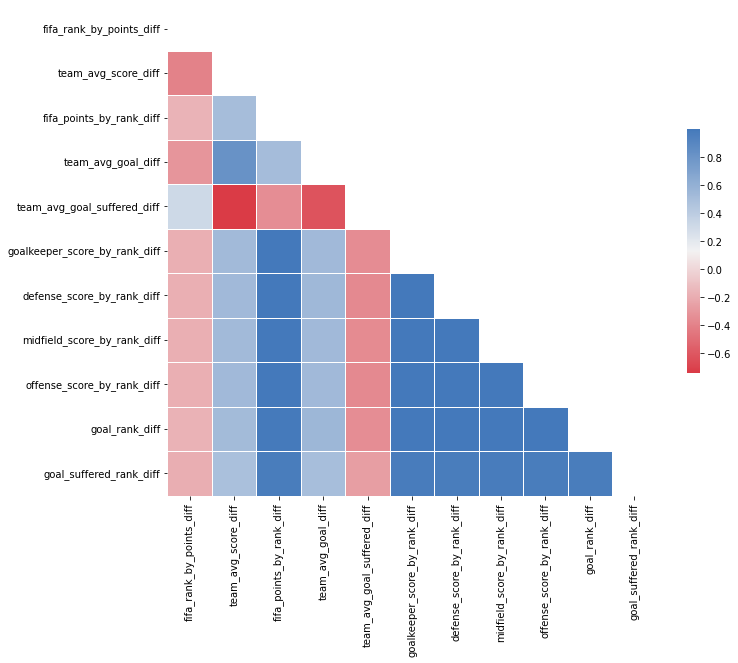

In [203]:
# Create a dataframe copy of only the feature columns from the original dataframe
data = pd.DataFrame(df[["fifa_rank_by_points_diff", "team_avg_score_diff", "fifa_points_by_rank_diff", "team_avg_goal_diff", "team_avg_goal_suffered_diff", 
                        "goalkeeper_score_by_rank_diff", "defense_score_by_rank_diff", "midfield_score_by_rank_diff", "offense_score_by_rank_diff", "goal_rank_diff", 
                        "goal_suffered_rank_diff"]])

# Use the Pandas corr() function to compute pairwise correlations for the dataframe
corr = data.corr()

# Use the Seaborn library to plot a diagonal correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(10, 250, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax) # Draw the heatmap with the mask and correct aspect ratio

<p style="font-family:verdana;">If you take a look at the correlation matrix of the features, blue represents "positive correlations" and red represents "negative correlations". It is obvious to see that the "fifa_points_by_rank_diff" feature has high correlation with 6 other features, therefore, we can remove that feature. We can also notice that the features "goalkeeper_score_by_rank_diff", "defense_score_by_rank_diff", "midfield_score_by_rank_diff", "offense_score_by_rank_diff", and "goal_rank_diff" all have high correlations with one another, so we can choose to keep one of them and remove the rest, in this case, I will choose to keep feature "goal_rank_diff". </p>
<ul>
    <li style="font-family:verdana;"><b>Create a feature importance comparison chart of all the features:</b></li>
</ul> 
<p style="font-family:verdana;">After analyzing the correlations among the features, I now want to check the relative importance of all the features to predict the outcome of a match. I will be fitting all the features and target data in a Random Forest Classification model. Note that for accuracy and simplicity, I will treat the outcome of "Draw" as a "Lose", so that we have a binary target dataset of only "Win" or "Lose". Then, I will be creating a horizontal bar chart of feature importances based on the classification model ranked from most important to least important and side by side of each other. Based on the visualization, we can determine if any feature has a significantly lower importance compared to others and we can consider removing that feature from our machine learning model. </p>

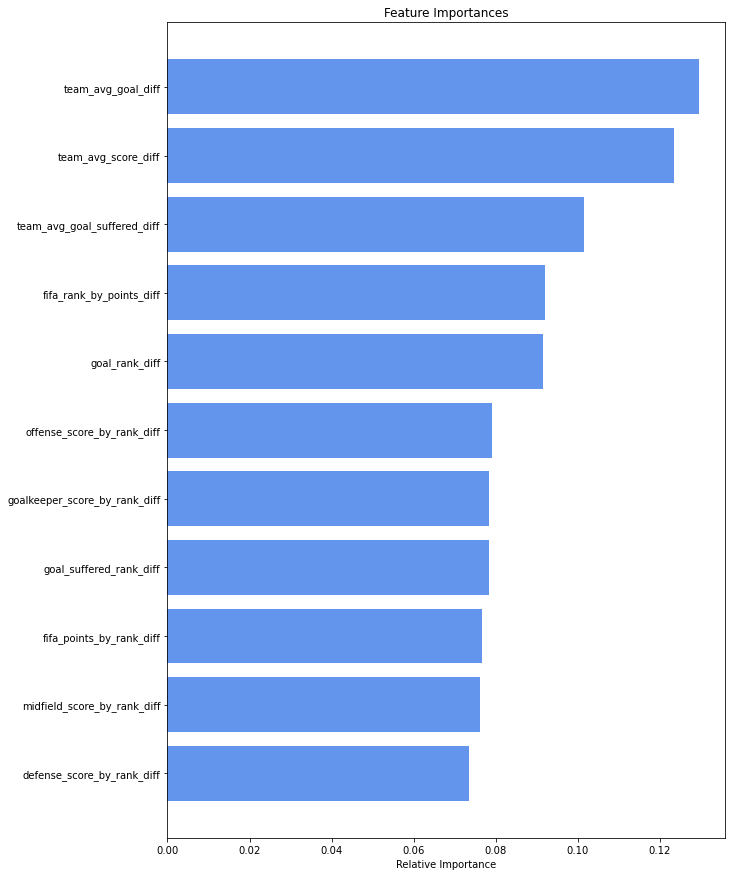

In [204]:
# Extract the feature data columns from the original dataframe
X = df[["fifa_rank_by_points_diff", "team_avg_score_diff", "fifa_points_by_rank_diff", "team_avg_goal_diff", "team_avg_goal_suffered_diff", 
        "goalkeeper_score_by_rank_diff", "defense_score_by_rank_diff", "midfield_score_by_rank_diff", "offense_score_by_rank_diff", "goal_rank_diff", 
        "goal_suffered_rank_diff"]]

# Turn the feature data into a list of same dimension of the target data (number of rows) by  wrapping a list of feature dataset for each match/row
X = X.to_numpy().reshape(-1, 11).tolist()

# Create a modified column of target data by transforming "Draw" to "Lose" for a binary target outcome
df["target"] = df["home_team_result"]
df.loc[df["target"] == "Draw", "target"] = "Lose"

# Extract the target data from the original dataframe
y = df["target"] 

# Spliting feature and target data into test and train sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Fit the Random Forest Classification Model with training sets
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Extract the column names for features
features = df[["fifa_rank_by_points_diff", "team_avg_score_diff", "fifa_points_by_rank_diff", "team_avg_goal_diff", "team_avg_goal_suffered_diff", 
               "goalkeeper_score_by_rank_diff", "defense_score_by_rank_diff", "midfield_score_by_rank_diff", "offense_score_by_rank_diff", "goal_rank_diff", 
               "goal_suffered_rank_diff"]].columns

# Plot the feature importances
importances = model.feature_importances_ # Obtain the feature importances using the built-in function of the classification model 
indices = np.argsort(importances) # Sort the feature importances by index
plt.figure(figsize=(10,15)) # Set up the matplotlib figure
plt.title("Feature Importances") # Add a title to the plot
plt.barh(range(len(indices)), importances[indices], color="cornflowerblue", align="center") # Generate the horizontal bar graph of feature importances
plt.yticks(range(len(indices)), [features[i] for i in indices]) # Set the labels of y-axis for each individual bar graph
plt.xlabel("Relative Importance") # Add an x-axis label
plt.show() # Display the graph

<p style="font-family:verdana;">If you take a look at the bar graph of the feature importances, there is not a feature that is significantly less important than the others, so there is no need to remove any. However, notice that the feature importance of the bottom features are extremely close and that result matches with our previous conclusion based on the correlation matrix where those features have high correlations and we only need to keep one of them and remove the rest for the machine learning model. </p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Machine Learning Model</center></b>
<ul>
    <li style="font-family:verdana;"><b>Step 1: Build the Random Forest Classification model with default hyperparameters.</b></li>
</ul>    
<p style="font-family:verdana;">Now after we selected the features we would like to use to predict the outcome of a match, we can now build the machine learning model. First, we need to split the feature data and target data into training and testing sets. Then, we use the training sets to fit the random forest classifier with default hyperparameters to train our model. Finally, we can draw insights on the performance metrics of the current model with default hyperparameters. </p>

confusion matrix:
 [[209 101]
 [117 156]]
true positive rate: [0.35849057 0.26758148]
true negative rate: [0.26758148 0.35849057]
false positive rate: [0.20068611 0.17324185]
false negative rate: [0.17324185 0.20068611]


The performance metrics for the Random Forest model with default parameters:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       310
           1       0.61      0.57      0.59       273

    accuracy                           0.63       583
   macro avg       0.62      0.62      0.62       583
weighted avg       0.63      0.63      0.63       583



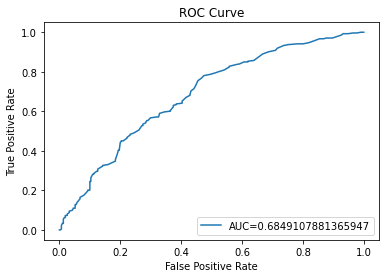

In [205]:
# Extract the column names for all the features we are using to predict 
feature_names = df[["fifa_rank_by_points_diff", "team_avg_score_diff", "team_avg_goal_diff", "team_avg_goal_suffered_diff", "goal_rank_diff", 
                    "goal_suffered_rank_diff"]].columns

# Extract the feature data from the original dataframe
X = df[["fifa_rank_by_points_diff", "team_avg_score_diff", "team_avg_goal_diff", "team_avg_goal_suffered_diff", "goal_rank_diff", "goal_suffered_rank_diff"]]

# Turn the feature data into a list of same dimension of the target data (number of rows) by  wrapping a list of feature dataset for each match/row
X = X.to_numpy().reshape(-1, 6).tolist()

# Create a target data column in the features dataframe and transform the "Win" to 1 and "Lose" to 0 for calculating AUC score and ROC curve
data["target"] = df["target"]
data.loc[data["target"] == "Lose", "target"] = 0
data.loc[data["target"] == "Win", "target"] = 1

# store the target data
y = data["target"].tolist()

# Split dataset into training set and test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

# Fit the Random Forest model with the default hyperparameters and predict the outcome
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# Create the confusion matrix for true positive, true negative, false positive, false negative values
cm = metrics.confusion_matrix(y_test, y_pred)

# Caclulate the true positive, true negative, false positive, false negative values for each classsification (0, 1) using formulas 
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

print("confusion matrix:\n", cm) # Confusion matrix with actual vs. predicted values

# Calculate the rate for each outcome based on the confusion matrix
print("true positive rate:", tp / (fp + fn + tp + tn))
print("true negative rate:", tn / (fp + fn + tp + tn))
print("false positive rate:", fp / (fp + fn + tp + tn))
print("false negative rate:", fn / (fp + fn + tp + tn))

print("\n") # Extra line space

# Performance metrics for the Random Forest model with default value
print("The performance metrics for the Random Forest model with default parameters:")
print(metrics.classification_report(y_test, y_pred))

# Calculate the AUC score 
y_pred_proba = rf.predict_proba(X_test)[::,1] 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr,tpr,label="AUC="+ str(auc))
plt.title("ROC Curve") # Add a title to the plot
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

<p style="font-family:verdana;">Above are the confusion matrix, performance metrics and a plot of ROC curve of the Random Forest Classification model with default hyperparameters. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives of the model, which allow us to calculate the TP, TN, FP, and FN rates. An ROC curve is a graph showing the performance of a classification model at all classification thresholds and AUC score is the area under the ROC curve, which provides an aggregate measure of performance across all possible classification thresholds. From the performance metrics, we can see that our model has an accuracy of 0.63, and from the plot, we can see that our model has an AUC score of about 0.68. This means our model with default hyperparameters can predict the outcome decently, but we can do better!</p>
<ul>
    <li style="font-family:verdana;"><b>Step 2: Tuning the hyperparameters for the Random Forest Classifier using Randomnized Search Cross Validation.</b></li>
</ul>    
<p style="font-family:verdana;">Although our Random Forest Classifier model can predict the outcome decently with the default hyperparameters, there is a way for us to improve its performance by finding the optimal hyperparameters for best performance. In order to do so, we create a list of range of values for each of the hyperparameter of the machine learning model we would like to optimize. Then, we turn those lists into a dictionary and use it as a parameter of Randomnized Search Cross Validation, which samples different hyperparameters combinations to find the optimal set of hyperparameters which will give the model with most optimal performance.  </p>

In [206]:
# Store each of the hyperparameters for Random Forest Classifier yet to be optimized in an individual list
n_estimators = list(range(1,200))
max_features = ["sqrt"]
max_depth = list(range(1,20))
min_samples_split = list(range(2,20))
min_samples_leaf = list(range(1,20))

# Combine each of the hyperparameter lists into a dictionary
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Create a new Random Forest Classifier model
rf = RandomForestClassifier()

# Perform Randomized Search Cross Validation on Random Forest Classifier and ranges of hyperparameters with cross-validation set to 3
clf = RandomizedSearchCV(rf, hyperparameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the optimal Randomized Search Cross Validation model
optimal_model = clf.fit(X,y)

# Store the optimal hyperparameter values into variables
opt_n_est = optimal_model.best_estimator_.get_params()["n_estimators"]
opt_max_features = optimal_model.best_estimator_.get_params()["max_features"]
opt_max_depth = optimal_model.best_estimator_.get_params()["max_depth"]
opt_split = optimal_model.best_estimator_.get_params()["min_samples_split"]
opt_leaf = optimal_model.best_estimator_.get_params()["min_samples_leaf"]

# Print the optimal hyperparameter values
print("Optimal n_estimators:", opt_n_est)
print("Optimal max_features:", opt_max_features)
print("Optimal max_depth:", opt_max_depth)
print("Optimal min_samples_split:", opt_split)
print("Optimal min_samples_leaf:", opt_leaf)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Optimal n_estimators: 16
Optimal max_features: sqrt
Optimal max_depth: 3
Optimal min_samples_split: 3
Optimal min_samples_leaf: 1


<p style="font-family:verdana;">Now that we have the optimal hyperparameters for our model, let us build the model again with these as parameters!</p>
<ul>
    <li style="font-family:verdana;"><b>Step 3: Build the Random Forest Classification model with optimal hyperparameters.</b></li>
</ul>
<p style="font-family:verdana;">After re-building the model with optimal hyperparameters, we will calculate the confusion matrix and true positive rate, true negative rate, false positive rate, false negative rate and compare its performance metrics, ROC curve, and AUC score with the model we built before with default hyperparameters to see there are any improvements!

confusion matrix:
 [[218  92]
 [ 98 175]]
true positive rate: [0.37392796 0.30017153]
true negative rate: [0.30017153 0.37392796]
false positive rate: [0.16809605 0.15780446]
false negative rate: [0.15780446 0.16809605]


The performance metrics for the Random Forest Classifier model with optimal hyperparameters:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       310
           1       0.66      0.64      0.65       273

    accuracy                           0.67       583
   macro avg       0.67      0.67      0.67       583
weighted avg       0.67      0.67      0.67       583



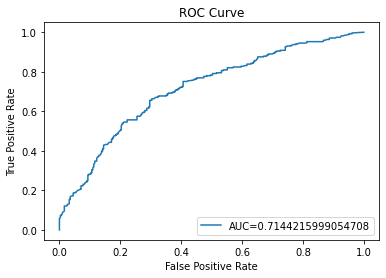

In [207]:
# Fit the Random Forest Classifier model again with the optimal hyperparameters
opt_rf = RandomForestClassifier(n_estimators=opt_n_est, max_features=opt_max_features, max_depth=opt_max_depth, min_samples_split=opt_split, min_samples_leaf=opt_leaf)
opt_rf.fit(X_train, y_train)
y_pred = opt_rf.predict(X_test)

# Create the confusion matrix for true positive, true negative, false positive, false negative values
cm = metrics.confusion_matrix(y_test, y_pred)

# Caclulate the true positive, true negative, false positive, false negative values for each classsification (0, 1) using formulas 
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

print("confusion matrix:\n", cm) # Confusion matrix with actual vs. predicted values

# Calculate the rate for each outcome based on the confusion matrix
print("true positive rate:", tp / (fp + fn + tp + tn))
print("true negative rate:", tn / (fp + fn + tp + tn))
print("false positive rate:", fp / (fp + fn + tp + tn))
print("false negative rate:", fn / (fp + fn + tp + tn))

print("\n") # Extra line space

# Performance metrics for the Random Forest Classifier model with optimal hyperparameters
print("The performance metrics for the Random Forest Classifier model with optimal hyperparameters:")
print(metrics.classification_report(y_test, y_pred))

# Calculate the AUC score 
y_pred_proba = opt_rf.predict_proba(X_test)[::,1] 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("ROC Curve") # Add a title to the plot
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

<p style="font-family:verdana;">If you take a look at the performance metrics and plot of the ROC curve of the updated model with optimal hyperparameters, compared to the performance of the model we built before with defalut hyperparameters, the accuracy increased from 0.63 to 0.67, and the AUC score increased from 0.68 to 0.71. So we successfully improved the performance of our model by tuning the hyperparameters! Comparing the two confusion matrices, it is obvious that the optimal model got more right than the default model.</p>
<p style="font-family:verdana;">Finally, we are now ready to use this machine learning model to predict the World Cup 2022 winner for each group!</p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Qatar World Cup 2022 Simulation</center></b>
<center><img src="wc22.jpg" width="650" height="750" vspace="12"></center>
<hr class="solid">
<ul>
    <li style="font-family:verdana;"><b>Step 1: Write helper functions to calculate the feature data for the teams.</b></li>
</ul>    
<p style="font-family:verdana;">In order to predict the target outcome of a match between two teams with the machine learning model, we need to calculate the feature data for both teams. I figured that the best way to do this is calculate the average value for all features based on a team's 5 most recent home games and 5 most recent away games, since these would be closer to the actual statistics of the teams participating in the World Cup this year. I will write two functions to achieve this. The stats(team) function takes in a team and calculate all of the relevant feature data for that team. The features(team1, team2) makes stats function call on both team1 and team2 to fetch the values and since the feature data is simply difference of values between the two teams. We can subtract each data of team1 by the one of team2 and we will have the feature data for our model. </p>


In [208]:
# This function fetches the relevant statistics for a team used in feature data
def stats(team):
    
    # Extract the matches/rows of the target team's 5 most recent home games
    h = df[df["home_team"].apply(lambda x: x == team)].tail(5)
    
    # Extract the matches/rows of the target team's 5 most recent away games
    a = df[df["away_team"].apply(lambda x: x == team)].tail(5)

    # Calculate the team's average rank scaled by points based on most recent matches
    avg_rank_by_points = ((a["away_team_fifa_rank"] / a["away_team_total_fifa_points"]).sum() + (h["home_team_fifa_rank"] / h["home_team_total_fifa_points"]).sum()) / 10
    
    # Calculate the team's average overall score based on most recent matches
    avg_offense = (a["away_team_mean_offense_score"].sum() + h["home_team_mean_offense_score"].sum()) / 10
    avg_midfield = (a["away_team_mean_midfield_score"].sum() + h["home_team_mean_midfield_score"].sum()) / 10
    avg_defense = (a["away_team_mean_defense_score"].sum() + h["home_team_mean_defense_score"].sum()) / 10
    avg_goalkeeper = (a["away_team_goalkeeper_score"].sum() + h["home_team_goalkeeper_score"].sum()) / 10
    avg_overall = (avg_offense + avg_midfield + avg_defense + avg_goalkeeper) / 4
    
    # Calculate the team's average goals based on most recent matches
    avg_goals = (a["away_team_score"].sum() + h["home_team_score"].sum()) / 10
    
    # Calculate the team's average goals suffered based on most recent matches
    avg_goals_suffered = (a["home_team_score"].sum() + h["away_team_score"].sum()) / 10
    
    # Calculate the team's average goals scaled by rank based on most recent matches
    avg_goals_rank = ((a["away_team_score"] / a["away_team_fifa_rank"]).sum() + (h["home_team_score"] / h["home_team_fifa_rank"]).sum()) / 10
    
    # Calculate the team's average goals suffered scaled by rank based on most recent matches
    avg_goals_suffered_rank = ((a["home_team_score"] / a["away_team_fifa_rank"]).sum() + (h["away_team_score"] / h["home_team_fifa_rank"]).sum()) / 10
    
    # Create a list to store the stats values and return it
    stats = []
    stats.extend([avg_rank_by_points, avg_overall, avg_goals, avg_goals_suffered, avg_goals_rank, avg_goals_suffered_rank])
    return stats

# This function takes an argument of two teams and calculate the feature data between them for the machine learning model
def features(team1, team2):
    
    # Calls to the stats function to fetch values for the feature data
    t1 = stats(team1)
    t2 = stats(team2)
    
    # Store the values in a dataframe to calculate the feature data by subtracting the columns and return it 
    dt = pd.DataFrame({"t1":t1, "t2":t2})
    features = dt["t1"] - dt["t2"]
    features = features.to_numpy().reshape(-1, 6).tolist()
    return features

<ul>
    <li style="font-family:verdana;"><b>Step 2: Create pandas dataframes of the World Cup groups and schedule of matches (include pre-processing). </b></li>
</ul>    
<p style="font-family:verdana;">In order to build a World Cup simulator to predict the winner of each group, we need a set of matches of the World Cup 2022 to use the machine learning model to predict the outcome of each of them. Based on the match result, we need to keep track of the points obtained by each team in their group. I will be using two CSV files I obtained from Kaggle.com. The "match-schedule.csv" includes the schedule of matches and "Qatar2022-teams.csv" includes the distribution of teams in groups for the World Cup. We need to load these CSV files into pandas dataframe to do operations. <b style="font-family:verdana;">*More information of the datasets can be found <a href="https://www.kaggle.com/datasets/amineteffal/qatar2022worldcupschudule">here</a>.</b> </p>

In [209]:
# Load the CSV file of World Cup groups of teams into a pandas dataframe
group_2022 = pd.read_csv("Qatar2022-teams.csv", sep=";")

# Change the name of "South Korea" to "Korea Republic" to match the name in the international matches dataset for consistency
group_2022.loc[group_2022["Team"] == "South Korea", "Team"] = "Korea Republic"

# Swap the Group column and Team column for better visualization
group_2022 = group_2022.reindex(columns=["Group", "Team"])

# Create a new column to keep track of points from group matches results, initialized to 0
group_2022["Points"] = 0

# Create individual dataframes for each group of teams
group_A = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "A")])
group_B = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "B")])
group_C = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "C")])
group_D = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "D")])
group_E = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "E")])
group_F = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "F")])
group_G = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "G")])
group_H = pd.DataFrame(group_2022[group_2022["Group"].apply(lambda x: x == "H")])

# Set the html display style for each group dataframe
group_A_style = group_A.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group A")
group_B_style = group_B.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group B")
group_C_style = group_C.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group C")
group_D_style = group_D.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group D")
group_E_style = group_E.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group E")
group_F_style = group_F.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group F")
group_G_style = group_G.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group G")
group_H_style = group_H.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group H")

# Load the CSV file of the match schedule into a pandas dataframe
match_2022 = pd.read_csv("match-schedule.csv", sep=";")

# Extract the matches/rows of group stage phase
group_match = match_2022[match_2022["phase"].apply(lambda x: x == "group matches")]

# Rename the column name to fix typo
group_match = group_match.rename({"coutry2": "country2"}, axis="columns")

# Change the name of "South Korea" to "Korea Republic" to match the name in the international matches dataset for consistency
group_match.loc[group_match["country1"] == "South Korea", "country1"] = "Korea Republic"
group_match.loc[group_match["country2"] == "South Korea", "country2"] = "Korea Republic"

# Create a list to store group labels for each match
group = []

# Loop through all of the group matches and identify country1's group using the dataframe of group of teams and append the label to the list
for i in range(len(group_match)):
    target = group_match["country1"][i]
    target_group = group_2022.loc[group_2022["Team"] == target]["Group"].to_string()
    target_group = target_group[len(target_group)-1]
    group.append(target_group)

# Create a new column in the dataframe to store the group labels for every group match
group_match["group"] = group

# Create individual dataframes for matches of the same group
group_match_A = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "A")])
group_match_B = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "B")])
group_match_C = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "C")])
group_match_D = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "D")])
group_match_E = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "E")])
group_match_F = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "F")])
group_match_G = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "G")])
group_match_H = pd.DataFrame(group_match[group_match["group"].apply(lambda x: x == "H")])

# Set the html display style for each dataframe of matches of the same group
group_match_A_style = group_match_A.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group A matches")
group_match_B_style = group_match_B.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group B matches")
group_match_C_style = group_match_C.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group C matches")
group_match_D_style = group_match_D.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group D matches")
group_match_E_style = group_match_E.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group E matches")
group_match_F_style = group_match_F.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group F matches")
group_match_G_style = group_match_G.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group G matches")
group_match_H_style = group_match_H.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group H matches")

# Display each group and the matches of the group side by side
display_html(group_A_style._repr_html_() + group_match_A_style._repr_html_(), raw=True)
display_html(group_B_style._repr_html_() + group_match_B_style._repr_html_(), raw=True)
display_html(group_C_style._repr_html_() + group_match_C_style._repr_html_(), raw=True)
display_html(group_D_style._repr_html_() + group_match_D_style._repr_html_(), raw=True)
display_html(group_E_style._repr_html_() + group_match_E_style._repr_html_(), raw=True)
display_html(group_F_style._repr_html_() + group_match_F_style._repr_html_(), raw=True)
display_html(group_G_style._repr_html_() + group_match_G_style._repr_html_(), raw=True)
display_html(group_H_style._repr_html_() + group_match_H_style._repr_html_(), raw=True)

Group A 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 0 
 A 
 Senegal 
 0 
 
 
 1 
 A 
 Qatar 
 0 
 
 
 2 
 A 
 Netherlands 
 0 
 
 
 3 
 A 
 Ecuador 
 0 
 
 
 

 
 Group A matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 0 
 1 
 21/11/2022 
 Qatar 
 Ecuador 
 group matches 
 A 
 
 
 1 
 2 
 21/11/2022 
 Senegal 
 Netherlands 
 group matches 
 A 
 
 
 17 
 18 
 25/11/2022 
 Qatar 
 Senegal 
 group matches 
 A 
 
 
 18 
 19 
 25/11/2022 
 Netherlands 
 Ecuador 
 group matches 
 A 
 
 
 34 
 35 
 29/11/2022 
 Ecuador 
 Senegal 
 group matches 
 A 
 
 
 35 
 36 
 29/11/2022 
 Netherlands 
 Qatar 
 group matches 
 A

Group B 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 4 
 B 
 Iran 
 0 
 
 
 5 
 B 
 England 
 0 
 
 
 6 
 B 
 USA 
 0 
 
 
 7 
 B 
 Wales 
 0 
 
 
 

 
 Group B matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 2 
 3 
 21/11/2022 
 England 
 Iran 
 group matches 
 B 
 
 
 3 
 4 
 21/11/2022 
 USA 
 Wales 
 group matches 
 B 
 
 
 16 
 17 
 25/11/2022 
 Wales 
 Iran 
 group matches 
 B 
 
 
 19 
 20 
 25/11/2022 
 England 
 USA 
 group matches 
 B 
 
 
 32 
 33 
 29/11/2022 
 Wales 
 England 
 group matches 
 B 
 
 
 33 
 34 
 29/11/2022 
 Iran 
 USA 
 group matches 
 B

Group C 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 8 
 C 
 Argentina 
 0 
 
 
 9 
 C 
 Saudi Arabia 
 0 
 
 
 10 
 C 
 Mexico 
 0 
 
 
 11 
 C 
 Poland 
 0 
 
 
 

 
 Group C matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 6 
 7 
 22/11/2022 
 Mexico 
 Poland 
 group matches 
 C 
 
 
 7 
 8 
 22/11/2022 
 Argentina 
 Saudi Arabia 
 group matches 
 C 
 
 
 21 
 22 
 26/11/2022 
 Poland 
 Saudi Arabia 
 group matches 
 C 
 
 
 23 
 24 
 26/11/2022 
 Argentina 
 Mexico 
 group matches 
 C 
 
 
 38 
 39 
 30/11/2022 
 Poland 
 Argentina 
 group matches 
 C 
 
 
 39 
 40 
 30/11/2022 
 Saudi Arabia 
 Mexico 
 group matches 
 C

Group D 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 12 
 D 
 Denmark 
 0 
 
 
 13 
 D 
 Tunisia 
 0 
 
 
 14 
 D 
 France 
 0 
 
 
 15 
 D 
 Australia 
 0 
 
 
 

 
 Group D matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 4 
 5 
 22/11/2022 
 France 
 Australia 
 group matches 
 D 
 
 
 5 
 6 
 22/11/2022 
 Denmark 
 Tunisia 
 group matches 
 D 
 
 
 20 
 21 
 26/11/2022 
 Tunisia 
 Australia 
 group matches 
 D 
 
 
 22 
 23 
 26/11/2022 
 France 
 Denmark 
 group matches 
 D 
 
 
 36 
 37 
 30/11/2022 
 Australia 
 Denmark 
 group matches 
 D 
 
 
 37 
 38 
 30/11/2022 
 Tunisia 
 France 
 group matches 
 D

Group E 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 16 
 E 
 Germany 
 0 
 
 
 17 
 E 
 Japan 
 0 
 
 
 18 
 E 
 Spain 
 0 
 
 
 19 
 E 
 Costa Rica 
 0 
 
 
 

 
 Group E matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 9 
 10 
 23/11/2022 
 Spain 
 Costa Rica 
 group matches 
 E 
 
 
 10 
 11 
 23/11/2022 
 Germany 
 Japan 
 group matches 
 E 
 
 
 24 
 25 
 27/11/2022 
 Japan 
 Costa Rica 
 group matches 
 E 
 
 
 27 
 28 
 27/11/2022 
 Spain 
 Germany 
 group matches 
 E 
 
 
 42 
 43 
 01/12/2022 
 Japan 
 Spain 
 group matches 
 E 
 
 
 43 
 44 
 01/12/2022 
 Costa Rica 
 Germany 
 group matches 
 E

Group F 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 20 
 F 
 Morocco 
 0 
 
 
 21 
 F 
 Croatia 
 0 
 
 
 22 
 F 
 Belgium 
 0 
 
 
 23 
 F 
 Canada 
 0 
 
 
 

 
 Group F matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 8 
 9 
 23/11/2022 
 Belgium 
 Canada 
 group matches 
 F 
 
 
 11 
 12 
 23/11/2022 
 Morocco 
 Croatia 
 group matches 
 F 
 
 
 25 
 26 
 27/11/2022 
 Belgium 
 Morocco 
 group matches 
 F 
 
 
 26 
 27 
 27/11/2022 
 Croatia 
 Canada 
 group matches 
 F 
 
 
 40 
 41 
 01/12/2022 
 Croatia 
 Belgium 
 group matches 
 F 
 
 
 41 
 42 
 01/12/2022 
 Canada 
 Morocco 
 group matches 
 F

Group G 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 24 
 G 
 Switzerland 
 0 
 
 
 25 
 G 
 Cameroon 
 0 
 
 
 26 
 G 
 Brazil 
 0 
 
 
 27 
 G 
 Serbia 
 0 
 
 
 

 
 Group G matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 12 
 13 
 24/11/2022 
 Switzerland 
 Cameroon 
 group matches 
 G 
 
 
 15 
 16 
 24/11/2022 
 Brazil 
 Serbia 
 group matches 
 G 
 
 
 28 
 29 
 28/11/2022 
 Cameroon 
 Serbia 
 group matches 
 G 
 
 
 30 
 31 
 28/11/2022 
 Brazil 
 Switzerland 
 group matches 
 G 
 
 
 46 
 47 
 02/12/2022 
 Serbia 
 Switzerland 
 group matches 
 G 
 
 
 47 
 48 
 02/12/2022 
 Cameroon 
 Brazil 
 group matches 
 G

Group H 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 28 
 H 
 Uruguay 
 0 
 
 
 29 
 H 
 Korea Republic 
 0 
 
 
 30 
 H 
 Portugal 
 0 
 
 
 31 
 H 
 Ghana 
 0 
 
 
 

 
 Group H matches 
 
 
   
 match 
 date 
 country1 
 country2 
 phase 
 group 
 
 
 
 
 13 
 14 
 24/11/2022 
 Uruguay 
 Korea Republic 
 group matches 
 H 
 
 
 14 
 15 
 24/11/2022 
 Portugal 
 Ghana 
 group matches 
 H 
 
 
 29 
 30 
 28/11/2022 
 Korea Republic 
 Ghana 
 group matches 
 H 
 
 
 31 
 32 
 28/11/2022 
 Portugal 
 Uruguay 
 group matches 
 H 
 
 
 44 
 45 
 02/12/2022 
 Ghana 
 Uruguay 
 group matches 
 H 
 
 
 45 
 46 
 02/12/2022 
 Korea Republic 
 Portugal 
 group matches 
 H

<ul>
    <li style="font-family:verdana;"><b>Step 3: Use the machine learning model to predict the result of every group match and update the points for teams in the group accordingly. </b></li>
</ul>    
<p style="font-family:verdana;">After preparing the datasets for groups of teams and matches for each group, we can now use the optimal Random Forest Classifier model we built earlier and our helper functions for feature data to predict the result of the matches! Based on the prediction of the matches, we can calculate the points each team earned. Note that for World Cup group matches, the winning team gets 3 points for a match; the losing team gets 0 points; if it ends in a draw, then each team gets 1 point. After all the group matches, foe each group, whoever has the most points wins the group! If there is a tie, whoever has a higher average winning probability wins!</p>
<b><center style="font-family:verdana;">Prediction for Group A </center></b>

In [210]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_A = group_match_A.reset_index()

# Loop through the matches/rows for group A. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_A)):
    team1 = group_match_A["country1"][i]
    team2 = group_match_A["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group A and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_A)):
    if result[i] == 0:
        result[i] = group_match_A["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_A.loc[group_A["Team"] == group_match_A["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_A["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_A.loc[group_A["Team"] == group_match_A["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_A["country1"][i] + " and " + group_match_A["country2"][i] + " " + "draw the match!" 
        group_A.loc[group_A["Team"] == group_match_A["country1"][i], "Points"] += 1
        group_A.loc[group_A["Team"] == group_match_A["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_A["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_A_style = group_match_A.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group A matches")

# Sort the dataframe by number of points each team has in descending order
group_A = group_A.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_A_style = group_A.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group A")

# Display each group and the matches of the group side by side after predictions
display_html(group_A_style._repr_html_() + group_match_A_style._repr_html_(), raw=True)

Group A 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 2 
 A 
 Netherlands 
 9 
 
 
 0 
 A 
 Senegal 
 4 
 
 
 3 
 A 
 Ecuador 
 4 
 
 
 1 
 A 
 Qatar 
 0 
 
 
 

 
 Group A matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 0 
 1 
 21/11/2022 
 Qatar 
 Ecuador 
 group matches 
 A 
 Ecuador wins the match with probability 0.63! 
 
 
 1 
 1 
 2 
 21/11/2022 
 Senegal 
 Netherlands 
 group matches 
 A 
 Netherlands wins the match with probability 0.66! 
 
 
 2 
 17 
 18 
 25/11/2022 
 Qatar 
 Senegal 
 group matches 
 A 
 Senegal wins the match with probability 0.64! 
 
 
 3 
 18 
 19 
 25/11/2022 
 Netherlands 
 Ecuador 
 group matches 
 A 
 Netherlands wins the match with probability 0.68! 
 
 
 4 
 34 
 35 
 29/11/2022 
 Ecuador 
 Senegal 
 group matches 
 A 
 Ecuador and Senegal draw the match! 
 
 
 5 
 35 
 36 
 29/11/2022 
 Netherlands 
 Qatar 
 group matches 
 A 
 Netherlands wins the match with probability 0.64!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Netherlands will win Group A with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group B </center></b>

In [211]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_B = group_match_B.reset_index()

# Loop through the matches/rows for group B. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_B)):
    team1 = group_match_B["country1"][i]
    team2 = group_match_B["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group B and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_B)):
    if result[i] == 0:
        result[i] = group_match_B["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_B.loc[group_B["Team"] == group_match_B["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_B["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_B.loc[group_B["Team"] == group_match_B["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_B["country1"][i] + " and " + group_match_B["country2"][i] + " " + "draw the match!" 
        group_B.loc[group_B["Team"] == group_match_B["country1"][i], "Points"] += 1
        group_B.loc[group_B["Team"] == group_match_B["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_B["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_B_style = group_match_B.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group B matches")

# Sort the dataframe by number of points each team has in descending order
group_B = group_B.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_B_style = group_B.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group B")

# Display each group and the matches of the group side by side after predictions
display_html(group_B_style._repr_html_() + group_match_B_style._repr_html_(), raw=True)

Group B 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 5 
 B 
 England 
 9 
 
 
 6 
 B 
 USA 
 6 
 
 
 7 
 B 
 Wales 
 3 
 
 
 4 
 B 
 Iran 
 0 
 
 
 

 
 Group B matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 2 
 3 
 21/11/2022 
 England 
 Iran 
 group matches 
 B 
 England wins the match with probability 0.64! 
 
 
 1 
 3 
 4 
 21/11/2022 
 USA 
 Wales 
 group matches 
 B 
 USA wins the match with probability 0.57! 
 
 
 2 
 16 
 17 
 25/11/2022 
 Wales 
 Iran 
 group matches 
 B 
 Wales wins the match with probability 0.64! 
 
 
 3 
 19 
 20 
 25/11/2022 
 England 
 USA 
 group matches 
 B 
 England wins the match with probability 0.64! 
 
 
 4 
 32 
 33 
 29/11/2022 
 Wales 
 England 
 group matches 
 B 
 England wins the match with probability 0.89! 
 
 
 5 
 33 
 34 
 29/11/2022 
 Iran 
 USA 
 group matches 
 B 
 USA wins the match with probability 0.65!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, England will win Group B with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group C </center></b>

In [212]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_C = group_match_C.reset_index()

# Loop through the matches/rows for group C. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_C)):
    team1 = group_match_C["country1"][i]
    team2 = group_match_C["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group C and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_C)):
    if result[i] == 0:
        result[i] = group_match_C["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_C.loc[group_C["Team"] == group_match_C["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_C["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_C.loc[group_C["Team"] == group_match_C["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_C["country1"][i] + " and " + group_match_C["country2"][i] + " " + "draw the match!" 
        group_C.loc[group_C["Team"] == group_match_C["country1"][i], "Points"] += 1
        group_C.loc[group_C["Team"] == group_match_C["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_C["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_C_style = group_match_C.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group C matches")

# Sort the dataframe by number of points each team has in descending order
group_C = group_C.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_C_style = group_C.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group C")

# Display each group and the matches of the group side by side after predictions
display_html(group_C_style._repr_html_() + group_match_C_style._repr_html_(), raw=True)

Group C 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 8 
 C 
 Argentina 
 9 
 
 
 10 
 C 
 Mexico 
 4 
 
 
 11 
 C 
 Poland 
 4 
 
 
 9 
 C 
 Saudi Arabia 
 0 
 
 
 

 
 Group C matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 6 
 7 
 22/11/2022 
 Mexico 
 Poland 
 group matches 
 C 
 Mexico and Poland draw the match! 
 
 
 1 
 7 
 8 
 22/11/2022 
 Argentina 
 Saudi Arabia 
 group matches 
 C 
 Argentina wins the match with probability 0.78! 
 
 
 2 
 21 
 22 
 26/11/2022 
 Poland 
 Saudi Arabia 
 group matches 
 C 
 Poland wins the match with probability 0.65! 
 
 
 3 
 23 
 24 
 26/11/2022 
 Argentina 
 Mexico 
 group matches 
 C 
 Argentina wins the match with probability 0.64! 
 
 
 4 
 38 
 39 
 30/11/2022 
 Poland 
 Argentina 
 group matches 
 C 
 Argentina wins the match with probability 0.80! 
 
 
 5 
 39 
 40 
 30/11/2022 
 Saudi Arabia 
 Mexico 
 group matches 
 C 
 Mexico wins the match with probability 0.74!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Argentina will win Group C with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group D </center></b>

In [213]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_D = group_match_D.reset_index()

# Loop through the matches/rows for group D. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_D)):
    team1 = group_match_D["country1"][i]
    team2 = group_match_D["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group D and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_D)):
    if result[i] == 0:
        result[i] = group_match_D["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_D.loc[group_D["Team"] == group_match_D["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_D["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_D.loc[group_D["Team"] == group_match_D["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_D["country1"][i] + " and " + group_match_D["country2"][i] + " " + "draw the match!" 
        group_D.loc[group_D["Team"] == group_match_D["country1"][i], "Points"] += 1
        group_D.loc[group_D["Team"] == group_match_D["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_D["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_D_style = group_match_D.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group D matches")

# Sort the dataframe by number of points each team has in descending order
group_D = group_D.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_D_style = group_D.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group D")

# Display each group and the matches of the group side by side after predictions
display_html(group_D_style._repr_html_() + group_match_D_style._repr_html_(), raw=True)

Group D 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 14 
 D 
 France 
 9 
 
 
 12 
 D 
 Denmark 
 6 
 
 
 13 
 D 
 Tunisia 
 1 
 
 
 15 
 D 
 Australia 
 1 
 
 
 

 
 Group D matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 4 
 5 
 22/11/2022 
 France 
 Australia 
 group matches 
 D 
 France wins the match with probability 0.72! 
 
 
 1 
 5 
 6 
 22/11/2022 
 Denmark 
 Tunisia 
 group matches 
 D 
 Denmark wins the match with probability 0.65! 
 
 
 2 
 20 
 21 
 26/11/2022 
 Tunisia 
 Australia 
 group matches 
 D 
 Tunisia and Australia draw the match! 
 
 
 3 
 22 
 23 
 26/11/2022 
 France 
 Denmark 
 group matches 
 D 
 France wins the match with probability 0.61! 
 
 
 4 
 36 
 37 
 30/11/2022 
 Australia 
 Denmark 
 group matches 
 D 
 Denmark wins the match with probability 0.74! 
 
 
 5 
 37 
 38 
 30/11/2022 
 Tunisia 
 France 
 group matches 
 D 
 France wins the match with probability 0.80!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, France will win Group D with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group E </center></b>

In [214]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_E = group_match_E.reset_index()

# Loop through the matches/rows for group E. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_E)):
    team1 = group_match_E["country1"][i]
    team2 = group_match_E["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group E and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_E)):
    if result[i] == 0:
        result[i] = group_match_E["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_E.loc[group_E["Team"] == group_match_E["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_E["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_E.loc[group_E["Team"] == group_match_E["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_E["country1"][i] + " and " + group_match_E["country2"][i] + " " + "draw the match!" 
        group_E.loc[group_E["Team"] == group_match_E["country1"][i], "Points"] += 1
        group_E.loc[group_E["Team"] == group_match_E["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_E["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_E_style = group_match_E.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group E matches")

# Sort the dataframe by number of points each team has in descending order
group_E = group_E.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_E_style = group_E.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group E")

# Display each group and the matches of the group side by side after predictions
display_html(group_E_style._repr_html_() + group_match_E_style._repr_html_(), raw=True)

Group E 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 16 
 E 
 Germany 
 7 
 
 
 18 
 E 
 Spain 
 7 
 
 
 17 
 E 
 Japan 
 3 
 
 
 19 
 E 
 Costa Rica 
 0 
 
 
 

 
 Group E matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 9 
 10 
 23/11/2022 
 Spain 
 Costa Rica 
 group matches 
 E 
 Spain wins the match with probability 0.72! 
 
 
 1 
 10 
 11 
 23/11/2022 
 Germany 
 Japan 
 group matches 
 E 
 Germany wins the match with probability 0.69! 
 
 
 2 
 24 
 25 
 27/11/2022 
 Japan 
 Costa Rica 
 group matches 
 E 
 Japan wins the match with probability 0.62! 
 
 
 3 
 27 
 28 
 27/11/2022 
 Spain 
 Germany 
 group matches 
 E 
 Spain and Germany draw the match! 
 
 
 4 
 42 
 43 
 01/12/2022 
 Japan 
 Spain 
 group matches 
 E 
 Spain wins the match with probability 0.80! 
 
 
 5 
 43 
 44 
 01/12/2022 
 Costa Rica 
 Germany 
 group matches 
 E 
 Germany wins the match with probability 0.76!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Germany and Spain both have 7 points. However, Spain has a higher average winning probability than Germany (Spain: (0.72+0.80)/2=0.76; Germany: (0.69+0.76)/2=0.72.5). So, Spain will win Group E with a tie breaker!</p>
<b><center style="font-family:verdana;">Prediction for Group F </center></b>

In [215]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_F = group_match_F.reset_index()

# Loop through the matches/rows for group F. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_F)):
    team1 = group_match_F["country1"][i]
    team2 = group_match_F["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group F and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_F)):
    if result[i] == 0:
        result[i] = group_match_F["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_F.loc[group_F["Team"] == group_match_F["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_F["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_F.loc[group_F["Team"] == group_match_F["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_F["country1"][i] + " and " + group_match_E["country2"][i] + " " + "draw the match!" 
        group_F.loc[group_F["Team"] == group_match_F["country1"][i], "Points"] += 1
        group_F.loc[group_F["Team"] == group_match_F["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_F["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_F_style = group_match_F.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group F matches")

# Sort the dataframe by number of points each team has in descending order
group_F = group_F.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_F_style = group_F.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group F")

# Display each group and the matches of the group side by side after predictions
display_html(group_F_style._repr_html_() + group_match_F_style._repr_html_(), raw=True)

Group F 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 22 
 F 
 Belgium 
 9 
 
 
 20 
 F 
 Morocco 
 2 
 
 
 21 
 F 
 Croatia 
 2 
 
 
 23 
 F 
 Canada 
 2 
 
 
 

 
 Group F matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 8 
 9 
 23/11/2022 
 Belgium 
 Canada 
 group matches 
 F 
 Belgium wins the match with probability 0.70! 
 
 
 1 
 11 
 12 
 23/11/2022 
 Morocco 
 Croatia 
 group matches 
 F 
 Morocco and Japan draw the match! 
 
 
 2 
 25 
 26 
 27/11/2022 
 Belgium 
 Morocco 
 group matches 
 F 
 Belgium wins the match with probability 0.63! 
 
 
 3 
 26 
 27 
 27/11/2022 
 Croatia 
 Canada 
 group matches 
 F 
 Croatia and Germany draw the match! 
 
 
 4 
 40 
 41 
 01/12/2022 
 Croatia 
 Belgium 
 group matches 
 F 
 Belgium wins the match with probability 0.72! 
 
 
 5 
 41 
 42 
 01/12/2022 
 Canada 
 Morocco 
 group matches 
 F 
 Canada and Germany draw the match!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Belgium will win Group F with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group G </center></b>

In [216]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_G = group_match_G.reset_index()

# Loop through the matches/rows for group G. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_G)):
    team1 = group_match_G["country1"][i]
    team2 = group_match_G["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group G and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_G)):
    if result[i] == 0:
        result[i] = group_match_G["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_G.loc[group_G["Team"] == group_match_G["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_G["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_G.loc[group_G["Team"] == group_match_G["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_G["country1"][i] + " and " + group_match_G["country2"][i] + " " + "draw the match!" 
        group_G.loc[group_G["Team"] == group_match_G["country1"][i], "Points"] += 1
        group_G.loc[group_G["Team"] == group_match_G["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_G["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_G_style = group_match_G.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group G matches")

# Sort the dataframe by number of points each team has in descending order
group_G = group_G.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_G_style = group_G.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group G")

# Display each group and the matches of the group side by side after predictions
display_html(group_G_style._repr_html_() + group_match_G_style._repr_html_(), raw=True)

Group G 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 26 
 G 
 Brazil 
 9 
 
 
 27 
 G 
 Serbia 
 4 
 
 
 24 
 G 
 Switzerland 
 2 
 
 
 25 
 G 
 Cameroon 
 1 
 
 
 

 
 Group G matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 12 
 13 
 24/11/2022 
 Switzerland 
 Cameroon 
 group matches 
 G 
 Switzerland and Cameroon draw the match! 
 
 
 1 
 15 
 16 
 24/11/2022 
 Brazil 
 Serbia 
 group matches 
 G 
 Brazil wins the match with probability 0.70! 
 
 
 2 
 28 
 29 
 28/11/2022 
 Cameroon 
 Serbia 
 group matches 
 G 
 Serbia wins the match with probability 0.69! 
 
 
 3 
 30 
 31 
 28/11/2022 
 Brazil 
 Switzerland 
 group matches 
 G 
 Brazil wins the match with probability 0.70! 
 
 
 4 
 46 
 47 
 02/12/2022 
 Serbia 
 Switzerland 
 group matches 
 G 
 Serbia and Switzerland draw the match! 
 
 
 5 
 47 
 48 
 02/12/2022 
 Cameroon 
 Brazil 
 group matches 
 G 
 Brazil wins the match with probability 0.90!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Brazil will win Group G with 9 points!</p>
<b><center style="font-family:verdana;">Prediction for Group H </center></b>

In [217]:
# Create a list to store the prediction of the match result for every match
result = []

# Create a list to store the probability of the prediction of the match result for every match
prob = []

# Reset the index for the dataframe
group_match_H = group_match_H.reset_index()

# Loop through the matches/rows for group H. Since the target outcome of our model is binary, in reality, 
# the match result could be a draw. So we need to run prediction twice on every match by switching 
# the home team and away team since there is no neutral location at World Cup for teams. Then, 
# if a team wins as a home team and loses as an away team, then we predict the match will be a draw. 
# Conversely, if a team loses as a home team and wins as an away team, it is also a draw.
for i in range(len(group_match_H)):
    team1 = group_match_H["country1"][i]
    team2 = group_match_H["country2"][i]
    ft1 = features(team1, team2)
    rs1 = opt_rf.predict(ft1)
    ft2 = features(team2, team1)
    rs2 = opt_rf.predict(ft2)
    rs1 = rs1.flatten()
    rs2 = rs2.flatten()
    
    # Different cases of prediction outcome of a match
    if rs1 == 1 and rs2 == 0:
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    elif rs1 == 0 and rs2 == 1: 
        r = rs1.tolist()[0]
        result.append(r)
        p = opt_rf.predict_proba(ft1).flatten().tolist()[r]
        prob.append(p)
    else:
        result.append(2)
        prob.append(0)

# Transform all decimals in the list to only two decimal places        
prob2 = ["%.2f" % elem for elem in prob]

# Loop through the matches/rows for group H and check the match results predictions and update the points for each team in the group dataframe
for i in range(len(group_match_H)):
    if result[i] == 0:
        result[i] = group_match_H["country2"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_H.loc[group_H["Team"] == group_match_H["country2"][i], "Points"] += 3
    elif result[i] == 1:
        result[i] = group_match_H["country1"][i] + " " + "wins the match with probability " + prob2[i] + "!"
        group_H.loc[group_H["Team"] == group_match_H["country1"][i], "Points"] += 3
    else:
        result[i] = group_match_H["country1"][i] + " and " + group_match_H["country2"][i] + " " + "draw the match!" 
        group_H.loc[group_H["Team"] == group_match_H["country1"][i], "Points"] += 1
        group_H.loc[group_H["Team"] == group_match_H["country2"][i], "Points"] += 1

# Create a column in the dataframe to store the predictions of match results
group_match_H["result"] = result

# Set the html display style for each dataframe of matches of the same group with predictions
group_match_H_style = group_match_H.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group H matches")

# Sort the dataframe by number of points each team has in descending order
group_H = group_H.sort_values(by=["Points"], ascending=False)

# Set the html display style for each group dataframe with updated points
group_H_style = group_H.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Group H")

# Display each group and the matches of the group side by side after predictions
display_html(group_H_style._repr_html_() + group_match_H_style._repr_html_(), raw=True)

Group H 
 
 
   
 Group 
 Team 
 Points 
 
 
 
 
 28 
 H 
 Uruguay 
 7 
 
 
 30 
 H 
 Portugal 
 7 
 
 
 29 
 H 
 Korea Republic 
 3 
 
 
 31 
 H 
 Ghana 
 0 
 
 
 

 
 Group H matches 
 
 
   
 index 
 match 
 date 
 country1 
 country2 
 phase 
 group 
 result 
 
 
 
 
 0 
 13 
 14 
 24/11/2022 
 Uruguay 
 Korea Republic 
 group matches 
 H 
 Uruguay wins the match with probability 0.60! 
 
 
 1 
 14 
 15 
 24/11/2022 
 Portugal 
 Ghana 
 group matches 
 H 
 Portugal wins the match with probability 0.68! 
 
 
 2 
 29 
 30 
 28/11/2022 
 Korea Republic 
 Ghana 
 group matches 
 H 
 Korea Republic wins the match with probability 0.57! 
 
 
 3 
 31 
 32 
 28/11/2022 
 Portugal 
 Uruguay 
 group matches 
 H 
 Portugal and Uruguay draw the match! 
 
 
 4 
 44 
 45 
 02/12/2022 
 Ghana 
 Uruguay 
 group matches 
 H 
 Uruguay wins the match with probability 0.84! 
 
 
 5 
 45 
 46 
 02/12/2022 
 Korea Republic 
 Portugal 
 group matches 
 H 
 Portugal wins the match with probability 0.79!

<p style="font-family:verdana;">Based on the prediction of our machine learning model, Uruguay and Portugal both have 7 points. However, Portugal has a higher average winning probability than Uruguay (Portugal: (0.68+0.79)/2=0.0.735; Uruguay: (0.60+0.84)/2=0.72). So, Portugal will win Group H with a tie breaker!</p>
<hr class="solid">
<b><center style="font-size:200%; font-family:verdana;">Conclusion</center></b>
<p style="font-family:verdana; padding-top:5px">In this tutotial, I did data exploration and analysis over the dataset of international matches records for pre-processing and preparing the dataframe for operations. Then, for feature engineering and data analysis, I created 11 different features that might be potentially relevant to the outcome of a match. After creating the features, I analyzed the correlations among the features and used Random Forest Classifier to compare the feature importance of the features to only select the features that are necessary. For machine learning, I built a Random Forest Classifier model with default parameters using feature data to draw insights on its performance. I also built another Random Forest Classifier model with optimal parameters using feature data. In order to find the optimal parameters, I tuned the hyperparameters using Randomnized Search Cross Validation to find the best parameters to provide the model with best performance among a range of different paramaters combinations. I found out that with the optimal paramaters, the performance of the model got better. So I proceeded with the improved model to predict the outcome of World Cup matches and winner of each group. 
<p style="font-family:verdana; padding-top:5px">In order to build the simulator for World Cup, I did data exploration and analysis again over the datasets of World Cup group teams and World Cup match schedule. I wrote two helper functions to help me extract the feature data of a match used to predict. Then, for every group match, I used the machine learning model I built to predict the outcome and probability of outcome and updated the points for each team in the group accordingly based on match results. By the time of the tutorial is done, the World Cup is already in its Final phase. Comparing our prediction with real life results, other than Group E and Group F, all the other group winners are accurate!</p>
<p style="font-family:verdana; padding-top:5px"> The main takaway from this tutorial is to demonstrate different phases of the Data Science pipeline. They are: Data Collection, Data representation, Data analysis, Hypothesis testing, and communication of insights. I was able to reach the objective of building a machine learning model to predict the group winners of World Cup by going back and forth through each of these stages. There are more things can be done with this tutorial. It can be extended to predict the final champion of World Cup by using the same machine learning model to predict the knockout stage matches based on the result of the group stage we have predicted. We can try different machine learning models with different feature data as well to see if there are more rooms for improvements.</p>